# Titantic: Machine Learning from Disaster

Used the following tutorials found for referece:
- https://www.kaggle.com/pamun9/titanic/titanic-data-science-solutions
- https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial/run/775411
- https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier

### 1. Load And Basic Data Inspection

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

# machine learning
from sklearn import cross_validation, preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

train = pd.read_csv('./train.csv', header = 0, dtype={'Age': np.float64})
test = pd.read_csv('./test.csv', header = 0, dtype={'Age': np.float64})

full = train.append( test , ignore_index = True )

train.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.describe()

/Users/user/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Variables

- Variable Description
- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

#### Conclusions
- Age is incomplete, missing maybe ~180 rows, but still possibly useful
- Cabin has too many missing rows, and should be dropped
- Anecdotally we can say that Ticket and PassengerId are unlikely to be useful, so drop these
- SibSp and Parch can probably be combined into a 'Family Size' feature
- A 'Title' feature can probably be extracted from Name

### 2. Deeper Analysis

In [4]:
# Helper Functions

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    aspect = kwargs.get( 'aspect' , 1 )
    facet = sns.FacetGrid( df , row = row , col = col , aspect=aspect)
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

#### 2.1 Age

/Users/user/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


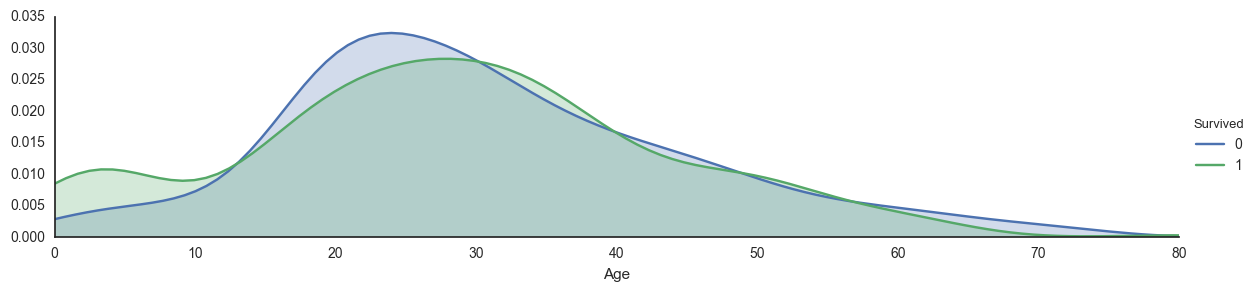

In [5]:
plot_distribution(train, var='Age', target='Survived')

#### 2.2 Fare

/Users/user/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


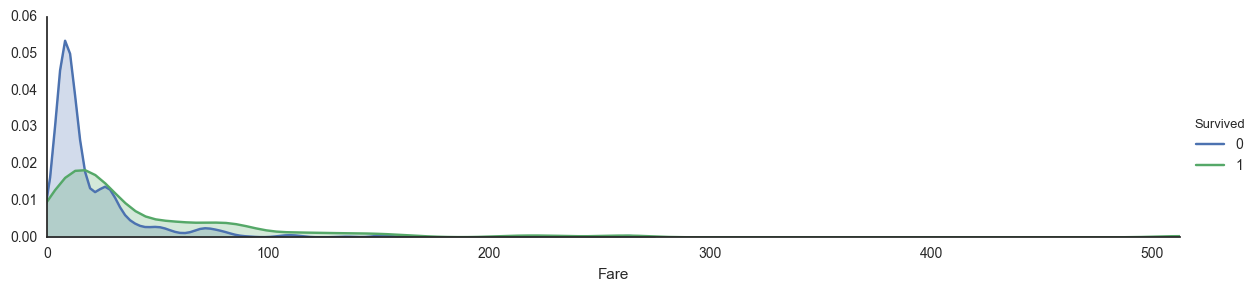

In [6]:
plot_distribution(train, var='Fare', target='Survived')

#### 2.3 Sex

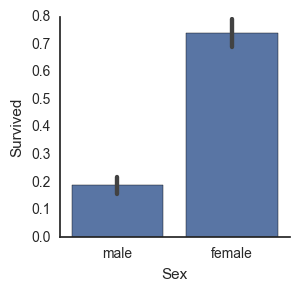

In [7]:
plot_categories( train , cat='Sex' , target='Survived')

#### 2.4 Pclass

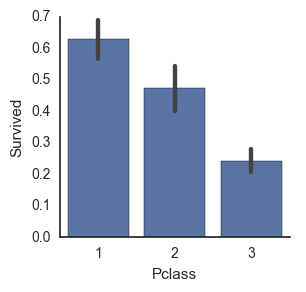

In [8]:
plot_categories( train , cat='Pclass' , target='Survived')

#### 2.5 Embarked

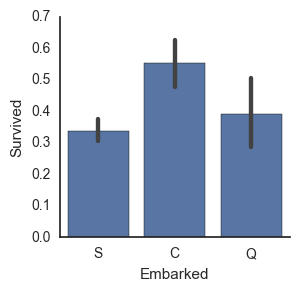

In [9]:
plot_categories( train , cat='Embarked' , target='Survived')

#### 2.6 Family Size

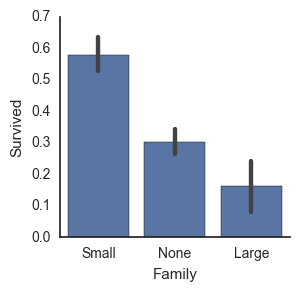

In [10]:
family_size = full.Parch + full.SibSp
full['Family Size'] = family_size

for dataset in [full]: 
    dataset.loc[ dataset['Family Size'] == 0, 'Family'] = 'None'
    dataset.loc[ (dataset['Family Size'] > 0) & (dataset['Family Size'] < 4), 'Family'] = 'Small'
    dataset.loc[ dataset['Family Size'] > 3, 'Family'] = 'Large'
    
plot_categories( full[:891] , cat='Family' , target='Survived')

#### 2.7 Title

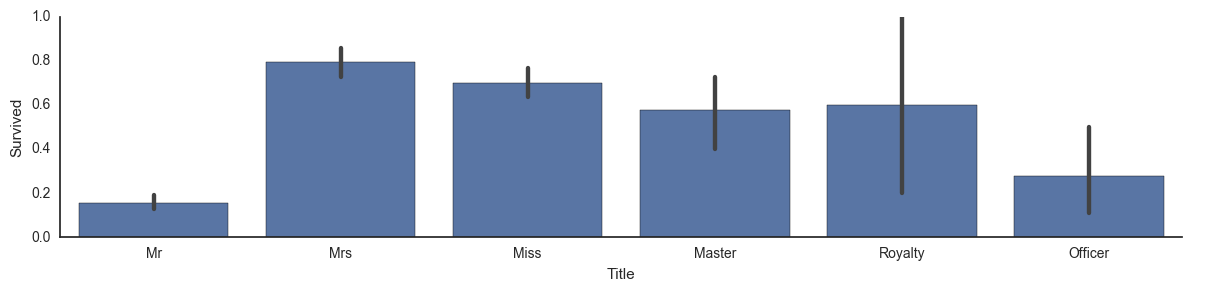

In [11]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }
# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )

# Plot Categories
survived_by_title = pd.DataFrame({'Survived': train.Survived, 'Title': title['Title']})
plot_categories(survived_by_title, cat='Title', target='Survived', aspect=4)

##### Conclusions

- Pclass: Seems lower class passengers had lower survival rates, include
- Title: Mr and Officers seemed to have low survival rates, whereas Mrs and Miss was very high
- Sex: Seeminly highest correlation to survivability. Include, convert to binary 'Female' feature
- Age: Include convert to binary 'Child' feature where Age < 10 = 1
- Family Size: Seems small families had higher rates of survival, between 1-3 people
- Fare: Seems very low paying passengers had much lower survival rate, convert to binary 'Low Fare' feature for Fare < 20
- Embarked: Slight differences, anecdotally doesn't seem to make sense to include, can experiment, possibly could overfit the data?

### 3. Feature Engineering and Data Cleansing

In [12]:
# Female
female = pd.Series( np.where( full.Sex == 'female' , 1 , 0 ) , name = 'Female' )

In [13]:
# Pclass
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )

pclass.drop(['Pclass_2'], axis=1, inplace=True)

In [14]:
# Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )

embarked.drop(['Embarked_C'], axis=1, inplace=True)
embarked.drop(['Embarked_Q'], axis=1, inplace=True)

In [15]:
# Title
title = pd.get_dummies( title.Title ) # pulled from above 2.7

title.drop(['Royalty'], axis=1, inplace=True)

In [16]:
# Child

# missing values for age, lets full with random ages using mean and std deviation
guess_ages = np.zeros((2,3))
guess_ages

full['Female'] = female

for dataset in [full]:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Female'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Female == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

for dataset in [full]:    
    dataset.loc[ dataset['Age'] <= 10, 'Child'] = 1
    dataset.loc[ dataset['Age'] > 10, 'Child'] = 0
    
child = full.Child

In [17]:
# Family Size
family = pd.get_dummies( full.Family , prefix='Family' )

In [18]:
# Fare
cheap_fare = pd.Series( np.where( full.Fare < 20, 1, 0) , name = 'Cheap Fare' )

In [19]:
X_full = pd.concat( [ female, child, family, cheap_fare, title, pclass, embarked ] , axis=1 )
y_full = full.Survived

X = X_full[:891]
y = y_full[:891]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Female          891 non-null int64
Child           891 non-null float64
Family_Large    891 non-null float64
Family_None     891 non-null float64
Family_Small    891 non-null float64
Cheap Fare      891 non-null int64
Master          891 non-null float64
Miss            891 non-null float64
Mr              891 non-null float64
Mrs             891 non-null float64
Officer         891 non-null float64
Pclass_1        891 non-null float64
Pclass_3        891 non-null float64
Embarked_S      891 non-null float64
dtypes: float64(12), int64(2)
memory usage: 97.5 KB


### 4. Classification

In [28]:
# Cross Validation Split
[X_train, X_test, y_train, y_test] = cross_validation.train_test_split(X, y, test_size = 0.3)
X_train.head()

,Female,Child,Family_Large,Family_None,Family_Small,Cheap Fare,Master,Miss,Mr,Mrs,Officer,Pclass_1,Pclass_3,Embarked_S
457,1,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
738,0,0.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
146,0,0.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
77,0,0.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
53,1,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
# Logistic Regression
lr_model = LogisticRegression(class_weight='balanced')

lr_model.fit(X_train, y_train)
print (lr_model.score( X_test , y_test ))

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr_model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

0.839552238806


,Feature,Correlation
6,Master,1.262467
0,Female,1.208240
11,Pclass_1,0.940740
3,Family_None,0.813223
9,Mrs,0.531312
4,Family_Small,0.531185
1,Child,0.305593
7,Miss,0.247466
5,Cheap Fare,-0.184443
13,Embarked_S,-0.218206


In [22]:
# Random Forests
rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train, y_train)
print (rf_model.score( X_test , y_test ))

0.833333333333


In [23]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
print (knn_model.score( X_test , y_test ))

0.844444444444


In [24]:
# Gradient Boosting

boost_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05,\
            max_depth=2, random_state=0)
boost_model.fit(X_train, y_train)
print (boost_model.score( X_test , y_test ))

0.811111111111


### 5. Predict and Submit

In [26]:
# choose best model
model = lr_model

# predict and write to csv for submission
test_Y = model.predict( X_full[891:] )
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } ).astype(int)
test.shape
test.head()
test.to_csv( 'predictions.csv' , index = False )